In [68]:
#Step 1 - Corpus Preprocessing 20pts

from gensim.corpora import Dictionary
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import *
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import brown
import nltk
import pandas as pd
import sklearn as sk
import math 



#Create a corpus with at least three documents
def listToString(s):  
    stringFromlist = ""  
    for ele in s:  
        stringFromlist += ' ' + ele   
    return stringFromlist  
        

#Create a corpus with at least three documents - 5pts
#created string from words then concatenated for corpus to then tokenize
#As a list
brown.categories()
wordsOne = brown.words(categories='adventure')
wordsTwo = brown.words(categories='mystery')
wordsThree = brown.words(categories='religion')
docList = [wordsOne,wordsTwo,wordsThree]

#Corpus of three documents 
corpusOfThree = stringOfOne + stringOfTwo + stringOfThree
stringOfOne = listToString(wordsOne)
stringOfTwo = listToString(wordsTwo)
stringOfThree = listToString(wordsThree)

#punctuation, stemming or lemmatization) - 15pt
def normalizeCorpus(corpus):
  #Pre-process corpus (tokenization, stopwords, punctuation, stemming or lemmatization) - 15pts
#Tokenize 
  from nltk.tokenize import word_tokenize 
  nltk.download('punkt')
  tokenized_corpus = word_tokenize(corpus)

  #Stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  filtered_words = [w for w in tokenized_corpus if not w in stopwords]

  #punctuation
  removedpunctuation_words = [word.lower() for word in filtered_words if word.isalpha()]

  #stemming
  ps = PorterStemmer()
  stemmed_words = [ps.stem(word) for word in removedpunctuation_words]

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words ]
  normalized_corpus = lemmatized_words
  return normalized_corpus 
  #Corpus has been normalized


#Pre-process corpus (tokenization, stopwords, punctuation, stemming or lemmatization) - 15pts
#Tokenize 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
tokenized_corpus = word_tokenize(corpusOfThree)

#Stopwords
stopwords = nltk.corpus.stopwords.words('english')
filtered_words = [w for w in tokenized_corpus if not w in stopwords]

#punctuation
removedpunctuation_words = [word.lower() for word in filtered_words if word.isalpha()]

#stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in removedpunctuation_words]

#lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words ]
normalized_corpus = lemmatized_words
#Corpus has been normalized

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Adapted from Lecture and Notes

In [83]:
# Step 2 - Frequency 20pts

import pandas as pd
import math 

first_sentence = stringOfOne.split(" ")
second_sentence = stringOfTwo.split(" ")
third_sentence = stringOfThree.split(" ")
total= set(first_sentence).union(set(second_sentence)).union(set(third_sentence))
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
wordDictC = dict.fromkeys(total, 0)
for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1

        
for word in second_sentence:
    wordDictC[word]+=1

pd.DataFrame([wordDictA, wordDictB, wordDictC ])

#Method for computing Term Frequency
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)
tfThird = computeTF(wordDictC, third_sentence)
#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond, tfThird])
print(tf)

#Method for computing Inverse Document Frequency
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return(idfDict)

idfs = computeIDF([wordDictA, wordDictB, wordDictC])
print(dict(list(idfs.items())[0:10]))
print("\n")

#Method for computing Term Frequency Inverse Document Frequency TF * IDF
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
idfThird = computeTFIDF(tfThird, idfs)
#putting it in a dataframe
tfidf= pd.DataFrame([idfFirst, idfSecond, idfThird])
print(tfidf)


                  I'd    rushed  ...  victory  proprietor  S-s-sahjunt
0  0.000014  0.000260  0.000043  ...      0.0    0.000000     0.000014
1  0.000017  0.000542  0.000017  ...      0.0    0.000017     0.000000
2  0.000025  0.000787  0.000025  ...      0.0    0.000025     0.000000

[3 rows x 15605 columns]
{'': 0.47712125471966244, "I'd": 0.47712125471966244, 'rushed': 0.47712125471966244, 'combo': 0.47712125471966244, 'belief': 0.47712125471966244, 'props': 0.47712125471966244, 'claim': 0.47712125471966244, 'deficiencies': 0.47712125471966244, 'tubes': 0.47712125471966244, 'transmuted': 0.47712125471966244}


                  I'd    rushed  ...  victory  proprietor  S-s-sahjunt
0  0.000007  0.000124  0.000021  ...      0.0    0.000000     0.000007
1  0.000008  0.000259  0.000008  ...      0.0    0.000008     0.000000
2  0.000012  0.000375  0.000012  ...      0.0    0.000012     0.000000

[3 rows x 15605 columns]


Hamdaoui, Yassine. “TF(Term Frequency)-IDF(Inverse Document Frequency) from Scratch in Python&nbsp;.” Medium, Towards Data Science, 10 Dec. 2019, towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558. 26 Feb, 2021

In [82]:
#Step 4 - Similarity 20pts

#Cosine Similarity 
from scipy.spatial import distance
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

X_list= normalizeCorpus(stringOfOne)[:100]
Y_list = normalizeCorpus(stringOfTwo)[:100]
Z_list = normalizeCorpus(stringOfThree)[:100]

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

# sw contains the list of stopwords 
sw = nltk.corpus.stopwords.words('english')
  
# remove stop words from the string 
X_set = {w for w in X_list if not w in sw}  
Y_set = {w for w in Y_list if not w in sw} 
Z_set = {w for w in Z_list if not w in sw} 
  
# form a set containing keywords of both strings  
rvectorx_y = X_set.union(Y_set)  
rvectorx_z = X_set.union(Z_set)  
rvectory_z = Y_set.union(Z_set)  
print(rvectorx_x)
print(rvectorx_y)
print(rvectorx_z)
def getCosineSimilarity(rvector, setOne, setTwo):
  l1 =[];l2 =[] 
  for w in rvector: 
      if w in setOne: l1.append(1) # create a vector 
      else: l1.append(0) 
      if w in setTwo: l2.append(1) 
      else: l2.append(0) 
  c = 0
    
  # cosine formula  
  for i in range(len(rvector)): 
          c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine 

XYCosine = getCosineSimilarity(rvectorx_y, X_set, Y_set)
XZCosine = getCosineSimilarity(rvectorx_z, X_set, Z_set)
YZCosine = getCosineSimilarity(rvectory_z, Y_set, Z_set) 

print("similarityXY: ", XYCosine) 
print("similarityXZ: ", XZCosine) 
print("similarityYZ: ", YZCosine) 

similarityMatrix= pd.DataFrame([XYCosine, XZCosine, YZCosine])
print(similarityMatrix)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
{'summer', 'awak', 'come', 'damag', 'told', 'morn', 'drone', 'lay', 'often', 'flash', 'dri', 'becom', 'monoton', 'get', 'anger', 'surfac', 'forget', 'adventur', 'defens', 'brennan', 'sometim', 'u', 'local', 'seem', 'quiet', 'marshal', 'hi', 'nurs', 'good', 'simpli', 'morgan', 'thing', 'patient', 'friend', 'antidot', 'could', 'go', 'poison', 'hanov', 'thought', 'sweet', 'day', 'woke', 'much', 'sell', 'disappoint', 'poignant', 'easiest', 'intern', 'state', 'gold', 'littl', 'appear', 'odor', 'gentl', 'live', 'back', 'dirti', 'ordinari', 'enough', 'way', 'ration', 'illinoi', 'night', 'certainli', 'hard', 'attend', 'lone', 'ill', 'charg', 'hot', 'smaller', 'troubl

Monacelli, Taylor. “Calculate Cosine Similarity given 2 Sentence Strings.” Stack Overflow, 20 Mar. 2020, stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings. 26 Feb, 2021

In [66]:
#Similarity Matrix for Cosine Similarity 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('brown')

X_list = normalizeCorpus(stringOfOne)[:100]
Y_list = normalizeCorpus(stringOfTwo)[:100]
Z_list = normalizeCorpus(stringOfThree)[:100]
docs = X_list + Y_list + Z_list


wordsOne = brown.words(categories='adventure')
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
feature_matrix = tv.fit_transform(docs)
feature_matrix = feature_matrix.toarray()
print(feature_matrix)

similarity_matrix = cosine_similarity(feature_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
print(similarity_df)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
     0    1    2    3    4    5    6    ...  293  294  295  296  297  298  299
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    

Scrivner, Olga, Kumar, A . “CH04a - Feature Engineering Text Data - Traditional Strategies”, 27 Feb, 2021

In [71]:
#Perform Jaccard Similarity between 3 documents. Provide metrics between each document - 10pts
from gensim.corpora import Dictionary
from scipy.spatial import distance
from gensim.matutils import jaccard

texts = [
   wordsOne, wordsTwo, wordsThree
]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
distanceBetweenZeroandTwo = jaccard(corpus[0], corpus[2])
distanceBetweenZeroandOne = jaccard(corpus[0], corpus[1])
distanceBetweenOneandTwo = jaccard(corpus[1], corpus[2])
print("\nThe jaccard distance between the Text 0 and Text 2: ")
print(distanceBetweenZeroandTwo)
print("The jaccard distance between the Text 0 and Text 2 is greater than .5 thus are similar\n")
print("The jaccard distance between the Text 0 and Text 1: ")
print(distanceBetweenZeroandOne)
print("The jaccard distance between the Text 0 and Text 1 is greater than .5 thus are similar\n")
print("The jaccard distance between the Text 1 and Text 2:" )
print(distanceBetweenOneandTwo)
print("The jaccard distance between the Text 1 and Text 2 is greater than .5 thus are similar\n")




The jaccard distance between the Text 0 and Text 2: 
0.7561637284924729
The jaccard distance between the Text 0 and Text 2 is greater than .5 thus are similar

The jaccard distance between the Text 0 and Text 1: 
0.6281271984254333
The jaccard distance between the Text 0 and Text 2 is greater than .5 thus are similar

The jaccard distance between the Text 1 and Text 2:
0.7386608400298236
The jaccard distance between the Text 0 and Text 2 is greater than .5 thus are similar



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
[[104.         115.           0.           2.        ]
 [116.         300.           0.           3.        ]
 [120.         301.           0.           4.        ]
 ...
 [318.         595.           5.62301885 292.        ]
 [360.         596.           5.62393599 296.        ]
 [357.         597.           5.62481631 300.        ]]
    Document\Cluster 1 Document\Cluster 2 Distance Cluster Size
0                  104                115        0            2
1                  116                300      

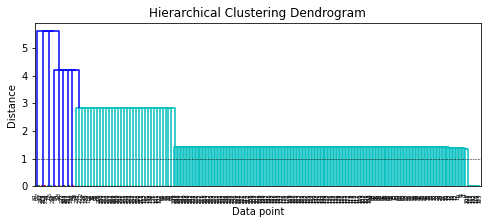

In [ ]:
#Step 5 - Clustering 30pts
#Perform Document clustering - 10pts
#Use Cosine similarity matrix from step 4 and find Cosine Distance (see practice)
#Use ward linkage for hierarchical clustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.cluster import  hierarchy
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X_list= normalizeCorpus(stringOfOne)[:100]
Y_list = normalizeCorpus(stringOfTwo)[:100]
Z_list = normalizeCorpus(stringOfThree)[:100]

docsList = [
   wordsOne, wordsTwo, wordsThree
]
docs = X_list + Y_list + Z_list

#Use Cosine similarity matrix from step 4 and find Cosine Distance (see practice)
#Use ward linkage for hierarchical clustering   
cosine_distance = 1 - cosine_similarity(feature_matrix)
linkage_matrix = ward(cosine_distance)
print(cosine_distance)
print(linkage_matrix)

#Create a table with distance and cluster size (see lecture). Provide the output table - 10pts
#Draw a dendrogram (see lecture and practice) - 10pts
similarity_matrix = cosine_similarity(feature_matrix)
Z = linkage(similarity_matrix, 'ward')

Z = linkage(similarity_matrix, 'ward')
tableWithDistanceandClusterSize = pd.DataFrame(Z, columns=['Document\Cluster 1',
'Document\Cluster 2',
'Distance', 'Cluster Size'], dtype="object")
print(tableWithDistanceandClusterSize)

plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c="k", ls="--", lw=0.5)
plt.show()






From Lecture 
Scrivner, Olga, Kumar, A . “Part 2. Distance Metrics
”, 27 Feb, 2021

Provide your brief conclusion:

The brief conclusion is that there is major intersection over union in all the data sets based on the output of the Jaccard Similary. The cosine measure of similarity between two non-zero vectors of an inner product space shows similarity in their respective vectors. Doc 1 had the most similarity to the other docuemnts and doc 3 had the least similarity to the other documents is the interpretation from the results of the cosine similarity. Also seen from the dendogram is that at a larger size cluster the distance increases. Overall the conclusion can be made the documents have interpretable relationships.
